In [380]:
import pandas as pd
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import xml.etree.ElementTree as et  # needed because the API data are in XML format

In [381]:
url = "http://api.brain-map.org/api/v2/data/query.xml"

In [382]:
# from the Allen Brain website on their API, the criteria of the RMA queries for extracting the data on all human brain cell types are: 
# model::ApiCellTypesSpecimenDetail,
# rma::criteria,[donor__species$il'homo sapiens'],
# rma::options[num_rows$eqall]

criteria = "model::ApiCellTypesSpecimenDetail, rma::criteria, [donor__species$il'homo sapiens'], rma::options[num_rows$eqall]"

In [383]:
response = requests.get(url, params = {"criteria":criteria})  #requesting the url with those criteria

In [384]:
response.status_code

200

In [385]:
data = response.text

In [386]:
print(data)

<Response success='true' start_row='0' num_rows='413' total_rows='413'><api-cell-types-specimen-details>
  <api-cell-typess-specimen-details>
    <cell-reporter-status nil="true"/>
    <csl--normalized-depth nil="true"/>
    <csl--x>273.0</csl--x>
    <csl--y>354.0</csl--y>
    <csl--z>216.0</csl--z>
    <donor--age>25 yrs</donor--age>
    <donor--disease-state>epilepsy</donor--disease-state>
    <donor--id>524848408</donor--id>
    <donor--name>H16.03.003</donor--name>
    <donor--race>White or Caucasian</donor--race>
    <donor--sex>Male</donor--sex>
    <donor--species>Homo Sapiens</donor--species>
    <donor--years-of-seizure-history>9</donor--years-of-seizure-history>
    <ef--adaptation>0.0278459596639436</ef--adaptation>
    <ef--avg-firing-rate>13.5725111407696</ef--avg-firing-rate>
    <ef--avg-isi>73.6783333333333</ef--avg-isi>
    <ef--f-i-curve-slope>0.1671875</ef--f-i-curve-slope>
    <ef--fast-trough-v-long-square>-53.8750038146973</ef--fast-trough-v-long-square>
    <ef-

In [387]:
# I saw that "data" is a string so I used the method fromstring() of ElementTree library that returns an elementTree object
# (that has a "tree" structure). The element is called "root" because it represents the root element of the XML file from which I can access
# all the other elements of the file ("children", attributes and so on)

root = et.fromstring(data)
root

<Element 'Response' at 0x0000021C156AFBA0>

In [391]:
def extract_data(xml_root_element):

    """ Function to extract the data from the first tag of the XML file string, contained in the main root (Response). It returns a dictionary 
    having the tags (attribute .tag) of the child elements (for example "donor age" in <donor--age>25 yrs</donor--age>) as keys and 
    the text content (attribute .text) as value ("25 yrs" in <donor--age>25 yrs</donor--age>). 
    -> This function can be executed inside the create_dataframe() function of function.py"""
    
    data = {}
    for child in xml_root_element:
        data[child.tag] = child.text
    return data    

In [392]:
def create_dataframe(first_tag:str):
    """ The function creates a dataframe from XLM files from which the data were extracted with extract_data() function.
    As argument it takes the first tag (string) within the root that incorporates all the elements associated"""
    df_rows = []
    for x in root.findall(first_tag):
        df_rows.append(extract_data(x))

    df = pd.DataFrame(df_rows)

    return df

In [393]:
df = create_dataframe(".//api-cell-typess-specimen-details")

In [394]:
df.shape

(413, 54)

In [29]:
df.head()

,cell-reporter-status,csl--normalized-depth,csl--x,csl--y,csl--z,donor--age,donor--disease-state,donor--id,donor--name,donor--race,...,specimen--id,specimen--name,structure--acronym,structure--id,structure--layer,structure--name,structure-parent--acronym,structure-parent--id,tag--apical,tag--dendrite-type
0,None,None,273.0,354.0,216.0,25 yrs,epilepsy,524848408,H16.03.003,White or Caucasian,...,525011903,H16.03.003.01.14.02,FroL,12113,3,"""frontal lobe""",FroL,12113,intact,spiny
1,None,None,322.0,255.0,92.0,33 yrs,epilepsy,536912860,H16.03.006,unknown,...,537307503,H16.03.006.01.04.04,MTG,12141,3,"""middle temporal gyrus""",MTG,12141,truncated,spiny
2,None,None,69.0,254.0,96.0,48 yrs,epilepsy,528574320,H16.06.009,unknown,...,528642047,H16.06.009.01.02.06.05,MTG,12141,5,"""middle temporal gyrus""",MTG,12141,NA,aspiny
3,None,0.164136578021453,127.0,354.0,219.0,26 yrs,tumor,518229880,H16.06.007,White or Caucasian,...,531523484,H16.06.007.01.07.03,FroL,12113,3,"""frontal lobe""",FroL,12113,intact,spiny
4,None,0.281917541960568,320.0,274.0,102.0,27 yrs,epilepsy,526633593,H16.03.005,White or Caucasian,...,526734407,H16.03.005.01.04.04,TemL,12139,3,"""temporal lobe""",TemL,12139,NA,aspiny


In [15]:
# first tried small modules to create the dataframe (then defined the function incorporating all
# 1. df_rows = [extract_data(x) for x in root.findall(".//api-cell-typess-specimen-details")]  # list containing the dictionary "data"

In [16]:
# 2. df_donors = pd.DataFrame(df_rows)

In [30]:
df.to_csv("../data/raw_data.csv")

### Day_3 --> I saved the csv file so I can work from that one

In [3]:
df_raw = pd.read_csv("../data/raw_data.csv")

In [4]:
df_raw.columns

Index(['Unnamed: 0', 'cell-reporter-status', 'csl--normalized-depth', 'csl--x',
       'csl--y', 'csl--z', 'donor--age', 'donor--disease-state', 'donor--id',
       'donor--name', 'donor--race', 'donor--sex', 'donor--species',
       'donor--years-of-seizure-history', 'ef--adaptation',
       'ef--avg-firing-rate', 'ef--avg-isi', 'ef--f-i-curve-slope',
       'ef--fast-trough-v-long-square', 'ef--peak-t-ramp', 'ef--ri', 'ef--tau',
       'ef--threshold-i-long-square',
       'ef--upstroke-downstroke-ratio-long-square', 'ef--vrest',
       'ephys-inst-thresh-thumb-path', 'ephys-thumb-path', 'erwkf--id',
       'line-name', 'm--biophys', 'm--biophys-all-active',
       'm--biophys-perisomatic', 'm--glif', 'morph-thumb-path',
       'nr--average-contraction', 'nr--average-parent-daughter-ratio',
       'nr--max-euclidean-distance', 'nr--number-bifurcations',
       'nr--number-stems', 'nr--reconstruction-type', 'nrwkf--id',
       'si--height', 'si--path', 'si--width', 'specimen--hemisphe

In [6]:
df_raw.head()

,Unnamed: 0,cell-reporter-status,csl--normalized-depth,csl--x,csl--y,csl--z,donor--age,donor--disease-state,donor--id,donor--name,...,specimen--id,specimen--name,structure--acronym,structure--id,structure--layer,structure--name,structure-parent--acronym,structure-parent--id,tag--apical,tag--dendrite-type
0,0,NaN,NaN,273.0,354.0,216.0,25 yrs,epilepsy,524848408,H16.03.003,...,525011903,H16.03.003.01.14.02,FroL,12113,3,"""frontal lobe""",FroL,12113,intact,spiny
1,1,NaN,NaN,322.0,255.0,92.0,33 yrs,epilepsy,536912860,H16.03.006,...,537307503,H16.03.006.01.04.04,MTG,12141,3,"""middle temporal gyrus""",MTG,12141,truncated,spiny
2,2,NaN,NaN,69.0,254.0,96.0,48 yrs,epilepsy,528574320,H16.06.009,...,528642047,H16.06.009.01.02.06.05,MTG,12141,5,"""middle temporal gyrus""",MTG,12141,NaN,aspiny
3,3,NaN,0.164137,127.0,354.0,219.0,26 yrs,tumor,518229880,H16.06.007,...,531523484,H16.06.007.01.07.03,FroL,12113,3,"""frontal lobe""",FroL,12113,intact,spiny
4,4,NaN,0.281918,320.0,274.0,102.0,27 yrs,epilepsy,526633593,H16.03.005,...,526734407,H16.03.005.01.04.04,TemL,12139,3,"""temporal lobe""",TemL,12139,NaN,aspiny


In [10]:
df1 = df_raw.copy()

In [11]:
def drop_col(df):
    """The functon drops any column containing all null values and specific columns not needed for the analysis"""
    df.dropna(how="all", axis = 1, inplace = True)
    df.drop(["Unnamed: 0", "donor--id", "donor--name", "donor--race", "donor--species", "threshold-i-long-square", 
             "fast-trough-v-long-square", "peak-t-ramp", "tau", "upstroke-downstroke-ratio-long-square", 
             "ephys-inst-thresh-thumb-path", "ephys-thumb-path", "erwkf--id", "m--biophys-perisomatic",
             "m--glif", "nr--max-euclidean-distance", "nr--average-contraction", 
             "nr--average-parent-daughter-ratio", "nr--number-stems", "specimen--hemisphere",
             "specimen--id", "specimen--name", "structure--acronym", "structure-parent--acronym", 
             "structure-parent--id", "tag--apical", "donor--years-of-seizure-history", "si--path",
             "si--height", "nrwkf--id", "si--width", "m--biophys-all-active", "morph-thumb-path", "nr--reconstruction-type",
            "m--biophys", "m--biophys-all-active"], axis = 1, inplace = True)
    return df   

In [12]:
def rename_ef(df):
    "Function that renames the column starting with ef-- (=electrophysiology), by removing ef--"""
    df.columns = [x.replace("ef--", "") if x.startswith("ef--") else x for x in df.columns]

    return df

In [13]:
df1 = rename_ef(df1)

In [14]:
df1 = drop_col(df1)
df1.columns

Index(['csl--normalized-depth', 'csl--x', 'csl--y', 'csl--z', 'donor--age',
       'donor--disease-state', 'donor--sex', 'adaptation', 'avg-firing-rate',
       'avg-isi', 'f-i-curve-slope', 'ri', 'vrest', 'nr--number-bifurcations',
       'structure--id', 'structure--layer', 'structure--name',
       'tag--dendrite-type'],
      dtype='object')

In [15]:
df1.head()

,csl--normalized-depth,csl--x,csl--y,csl--z,donor--age,donor--disease-state,donor--sex,adaptation,avg-firing-rate,avg-isi,f-i-curve-slope,ri,vrest,nr--number-bifurcations,structure--id,structure--layer,structure--name,tag--dendrite-type
0,NaN,273.0,354.0,216.0,25 yrs,epilepsy,Male,0.027846,13.572511,73.678333,0.167187,159.531131,-70.561035,NaN,12113,3,"""frontal lobe""",spiny
1,NaN,322.0,255.0,92.0,33 yrs,epilepsy,Female,NaN,89.285714,11.200000,0.007813,34.531251,-70.889648,NaN,12141,3,"""middle temporal gyrus""",spiny
2,NaN,69.0,254.0,96.0,48 yrs,epilepsy,Female,0.001610,77.445126,12.912368,0.735093,201.562688,-69.209610,NaN,12141,5,"""middle temporal gyrus""",aspiny
3,0.164137,127.0,354.0,219.0,26 yrs,tumor,Male,NaN,1.687992,592.420000,0.072991,51.562499,-76.004082,44.0,12113,3,"""frontal lobe""",spiny
4,0.281918,320.0,274.0,102.0,27 yrs,epilepsy,Male,0.043659,207.900208,4.810000,0.019304,60.156137,-71.386292,18.0,12139,3,"""temporal lobe""",aspiny


In [16]:
def round_col(df):
    
    df["adaptation"] = df["adaptation"].apply(lambda x: round(x, 3))
    df["vrest"] = df["vrest"].apply(lambda x: round(x, 2))
    df["avg-isi"] = df["avg-isi"].apply(lambda x: round(x, 2))
    df["ri"] = df["ri"].apply(lambda x: round(x, 2))

    return df

In [17]:
df1 = round_col(df1)

In [18]:
def n_age(df):
    
    df["donor--age"] = df["donor--age"].str.replace(" yrs", "")
    df["donor--age"] = df["donor--age"].apply(lambda x: int(x) if pd.notnull(x) else np.nan)

    return df

In [19]:
df1 = n_age(df1)
df1["donor--age"].unique()

array([25, 33, 48, 26, 27, 37, 18, 83, 38, 35, 39, 34, 24, 28, 29, 67, 52,
       71, 23, 41, 42, 65, 60, 61, 31, 19, 47, 30], dtype=int64)

In [20]:
def format_firing(df):
    """ Function that converts the firing rates object in floats with two decimals. 
    It handles NaN values and leaves them as they are, if present"""
    
    df["avg-firing-rate"] = df["avg-firing-rate"].apply(lambda x: round(float(x), 2) if pd.notnull(x) else np.nan)

    return df

In [21]:
df1 = format_firing(df1)
df1["avg-firing-rate"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 413 entries, 0 to 412
Series name: avg-firing-rate
Non-Null Count  Dtype  
--------------  -----  
357 non-null    float64
dtypes: float64(1)
memory usage: 3.4 KB


In [22]:
def format_curve_slope(df):
    """ Function that converts values of f-i curve slope from strings to floats with 3 decimals.
    It handles NaN values and leaves them as they are, if present"""
    
    df["f-i-curve-slope"] = df["f-i-curve-slope"].apply(lambda x: round(float(x), 3) if pd.notnull(x) else np.nan)

    return df

In [23]:
df1 = format_curve_slope(df1)

In [24]:
df = df1.to_csv("clean_data.csv")

## From here, analysis of the "clean_data.csv" dataframe

In [5]:
df = pd.read_csv("../data/clean_data.csv")
df.drop(["Unnamed: 0"], axis = 1, inplace = True)
df.shape

(413, 18)

In [6]:
df.columns

Index(['csl--normalized-depth', 'csl--x', 'csl--y', 'csl--z', 'donor--age',
       'donor--disease-state', 'donor--sex', 'adaptation', 'avg-firing-rate',
       'avg-isi', 'f-i-curve-slope', 'ri', 'vrest', 'nr--number-bifurcations',
       'structure--id', 'structure--layer', 'structure--name',
       'tag--dendrite-type'],
      dtype='object')

In [7]:
def age_category(age):
    """Functions that creates age categories. 
    It returns different categories of age, so can be applied to the column "donor--age" 
    and to create a new column where each donor has an assignedage category"""

    if isinstance(age, int):
        if 18 <= age <= 24:
            return "18-24 years"
        elif 25 <= age <= 30:
            return "25-30 years"
        elif 31 <= age <= 40:
            return "31-40 years"
        elif 41 <= age <= 50 :
            return "41-50 years"
        elif 51 <= age <= 65:
            return "51-65 years"
        elif 66 <= age <= 83:
            return "66-83 years"
        else:
            return np.nan
    else:
        return np.nan

In [8]:
df["age-category"] = df["donor--age"].apply(age_category)
df["age-category"].unique()

array(['25-30 years', '31-40 years', '41-50 years', '18-24 years',
       '66-83 years', '51-65 years'], dtype=object)

In [9]:
df_ephys_age = df.groupby(["age-category"]).agg({"avg-firing-rate" : ["mean" , "std"] , "f-i-curve-slope": ["mean" , "std"]})
df_ephys_age

avg-firing-rate            f-i-curve-slope          
                        mean        std            mean       std
age-category                                                     
18-24 years        24.852800  29.901476        0.220987  0.200840
25-30 years        44.598125  62.819639        0.166321  0.198782
31-40 years        27.730826  32.773846        0.175606  0.178622
41-50 years        41.854909  51.810424        0.128486  0.145904
51-65 years        25.159412  33.856813        0.224861  0.155300
66-83 years        21.993611  32.646082        0.136333  0.134236

In [20]:
df["donor--disease-state"].unique()

array(['epilepsy', 'tumor'], dtype=object)

In [21]:
df["structure--name"].unique()

array(['"frontal lobe"', '"middle temporal gyrus"', '"temporal lobe"',
       '"middle frontal gyrus"', '"planum polare"', '"angular gyrus"',
       '"superior frontal gyrus"', '"inferior temporal gyrus"',
       '"inferior frontal gyrus"'], dtype=object)

In [10]:
# create a new df with only data from epilepsy donors

df_epilepsy = df[df["donor--disease-state"] == "epilepsy"]

In [11]:
# create a new df with only data from tumor donors

df_tumor = df[df["donor--disease-state"] == "tumor"]

In [16]:
df_firing_region_disease = pd.merge(df_firing_region_epilepsy, df_firing_region_tumor, on = "structure--name", how = "outer", suffixes = ("-epilepsy", "-tumor"))
df_firing_region_disease

avg-firing-rate-epilepsy             \
                                              mean        std   
structure--name                                                 
"angular gyrus"                          33.881111  34.443089   
"frontal lobe"                           33.706000  46.048165   
"inferior temporal gyrus"                11.862727   7.783057   
"middle temporal gyrus"                  26.164847  32.797253   
"planum polare"                          81.884000  56.629511   
"superior frontal gyrus"                 97.260000  94.285618   
"temporal lobe"                          59.730000  87.326149   
"inferior frontal gyrus"                       NaN        NaN   
"middle frontal gyrus"                         NaN        NaN   

                          avg-firing-rate-tumor              
                                           mean         std  
structure--name                                              
"angular gyrus"                       11.152000    6.188923  
"frontal lobe"                        60.584286   61.632721  
"inferior temporal gyrus"                   NaN         NaN  
"middle temporal gyrus"               39.697000   50.776398  
"planum polare"                             NaN         NaN  
"superior frontal gyrus"                    NaN         NaN  
"temporal lobe"                             NaN         NaN  
"inferior frontal gyrus"             132.213333  108.848352  
"middle frontal gyrus"                30.833636   47.582254

In [17]:
#df_firing_region = df.groupby(["structure--name", "donor--disease-state"]).agg({"avg-firing-rate":["mean", "std"]})
#pivot_firing_region = pd.pivot_table(df_firing_region, columns= ["donor--disease-state"], index = "structure--name", values = "avg-firing-rate")
df_firing_region = df.groupby(["structure--name", "donor--disease-state"]).agg({"avg-firing-rate":["mean", "std"]})
pivot_firing_region = pd.pivot_table(df_firing_region, index = "structure--name", columns= ["donor--disease-state"], values = "avg-firing-rate")
pivot_firing_region.reset_index(inplace = True)
pivot_firing_region

structure--name       mean              \
donor--disease-state                              epilepsy       tumor   
0                               "angular gyrus"  33.881111   11.152000   
1                                "frontal lobe"  33.706000   60.584286   
2                      "inferior frontal gyrus"        NaN  132.213333   
3                     "inferior temporal gyrus"  11.862727         NaN   
4                        "middle frontal gyrus"        NaN   30.833636   
5                       "middle temporal gyrus"  26.164847   39.697000   
6                               "planum polare"  81.884000         NaN   
7                      "superior frontal gyrus"  97.260000         NaN   
8                               "temporal lobe"  59.730000         NaN   

                            std              
donor--disease-state   epilepsy       tumor  
0                     34.443089    6.188923  
1                     46.048165   61.632721  
2                           NaN  108.848352  
3                      7.783057         NaN  
4                           NaN   47.582254  
5                     32.797253   50.776398  
6                     56.629511         NaN  
7                     94.285618         NaN  
8                     87.326149         NaN

In [18]:
df_firing_region.reset_index(inplace = True)
df_firing_region

structure--name donor--disease-state avg-firing-rate            
                                                              mean         std
0             "angular gyrus"             epilepsy       33.881111   34.443089
1             "angular gyrus"                tumor       11.152000    6.188923
2              "frontal lobe"             epilepsy       33.706000   46.048165
3              "frontal lobe"                tumor       60.584286   61.632721
4    "inferior frontal gyrus"                tumor      132.213333  108.848352
5   "inferior temporal gyrus"             epilepsy       11.862727    7.783057
6      "middle frontal gyrus"                tumor       30.833636   47.582254
7     "middle temporal gyrus"             epilepsy       26.164847   32.797253
8     "middle temporal gyrus"                tumor       39.697000   50.776398
9             "planum polare"             epilepsy       81.884000   56.629511
10   "superior frontal gyrus"             epilepsy       97.260000   94.285618
11            "temporal lobe"             epilepsy       59.730000   87.326149

In [21]:
def categorize_regions(df):
    
    mapping = {'"frontal lobe"' : 'frontal lobe',
               '"middle temporal gyrus"' : 'temporal lobe',
               '"temporal lobe"': 'temporal lobe',
               '"middle frontal gyrus"' : 'frontal lobe',
               '"planum polare"' : 'planum polare',
               '"angular gyrus"' : 'angular gyrus',
               '"superior frontal gyrus"': 'frontal lobe',
               '"inferior temporal gyrus"' : 'temporal lobe',
               '"inferior frontal gyrus"' : 'frontal lobe'}
    
    df["structure--name"] = df["structure--name"].replace(mapping)

    return df

In [22]:
df = categorize_regions(df)

In [138]:
count_cells = df.groupby(["structure--name", "donor--disease-state"]).size().reset_index(name="count")
count_cells

,structure--name,donor--disease-state,count
0,angular gyrus,epilepsy,11
1,angular gyrus,tumor,5
2,frontal lobe,epilepsy,8
3,frontal lobe,tumor,48
4,planum polare,epilepsy,6
5,temporal lobe,epilepsy,325
6,temporal lobe,tumor,10


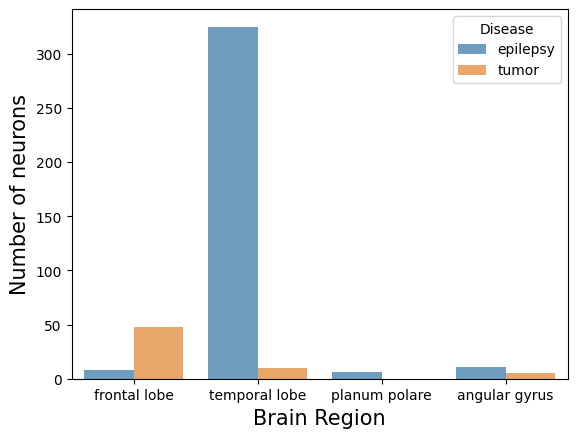

In [335]:
bar_count_region = sns.barplot(data=count_cells, x="structure--name", y="count", 
                                   order=["frontal lobe", "temporal lobe", "planum polare", "angular gyrus"], 
                                   hue="donor--disease-state", alpha = 0.7)
bar_count_region.set_xlabel("Brain Region", fontsize=15)
bar_count_region.set_ylabel("Number of neurons", fontsize=15)
plt.legend(title = "Disease")
plt.savefig("bar_count_region.png")

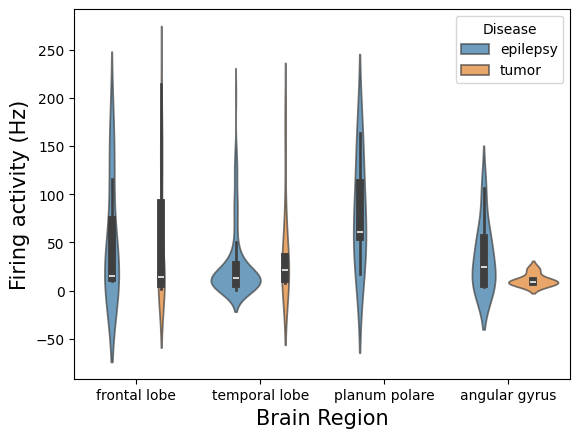

In [336]:
violin_firing_region = sns.violinplot(data=df, x="structure--name", y="avg-firing-rate", hue="donor--disease-state", alpha = 0.7)
violin_firing_region.set_xlabel("Brain Region", fontsize=15)
violin_firing_region.set_ylabel("Firing activity (Hz)", fontsize=15)
plt.legend(title = "Disease")
plt.savefig("violin_firing.png")

In [158]:
df.columns

Index(['csl--normalized-depth', 'csl--x', 'csl--y', 'csl--z', 'donor--age',
       'donor--disease-state', 'donor--sex', 'adaptation', 'avg-firing-rate',
       'avg-isi', 'f-i-curve-slope', 'ri', 'vrest', 'nr--number-bifurcations',
       'structure--id', 'structure--layer', 'structure--name',
       'tag--dendrite-type', 'age-category'],
      dtype='object')

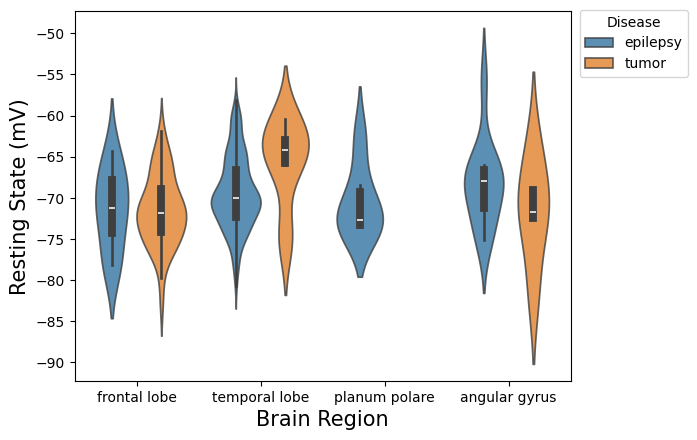

In [341]:
violin_firing_region = sns.violinplot(data=df, x="structure--name", y="vrest", hue="donor--disease-state", alpha = 0.8)
violin_firing_region.set_xlabel("Brain Region", fontsize=15)
violin_firing_region.set_ylabel("Resting State (mV)", fontsize=15)
plt.legend(title = "Disease", bbox_to_anchor=(1.25, 0.913), loc = "center right")

plt.savefig("violin_rest.png", bbox_inches='tight')

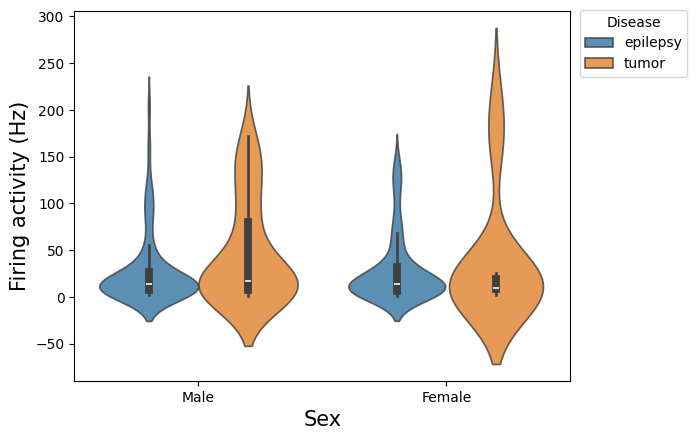

In [339]:
violin_firing_region = sns.violinplot(data=df, x="donor--sex", y="avg-firing-rate", hue="donor--disease-state", alpha = 0.8)
violin_firing_region.set_xlabel("Sex", fontsize=15)
violin_firing_region.set_ylabel("Firing activity (Hz)", fontsize=15)
plt.legend(title = "Disease", bbox_to_anchor=(1.25, 0.913), loc = "center right")

plt.savefig("violin_firing_age.png", bbox_inches='tight')

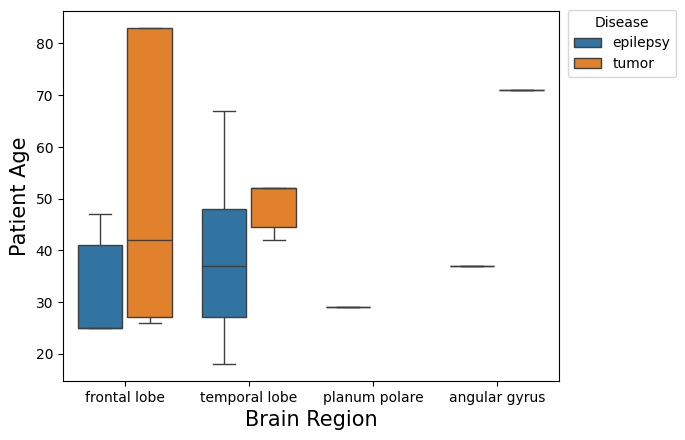

In [179]:
point_age_region = sns.boxplot(data=df, x="structure--name", y="donor--age", hue = "donor--disease-state", gap=.1) 
# (alpha = transparency, the more the data points overlap, the more is the contrast of the scatter points
point_age_region.set_xlabel("Brain Region", fontsize=15)
point_age_region.set_ylabel("Patient Age", fontsize=15)
plt.legend(title = "Disease", prop = {"size" : 10}, bbox_to_anchor=(1.25, 0.913), loc = "center right")

# No interesting conclusions from the age of the patients

### Analysis of neurons morphology

In [342]:
df.columns

Index(['csl--normalized-depth', 'csl--x', 'csl--y', 'csl--z', 'donor--age',
       'donor--disease-state', 'donor--sex', 'adaptation', 'avg-firing-rate',
       'avg-isi', 'f-i-curve-slope', 'ri', 'vrest', 'nr--number-bifurcations',
       'structure--id', 'structure--layer', 'structure--name',
       'tag--dendrite-type', 'age-category'],
      dtype='object')

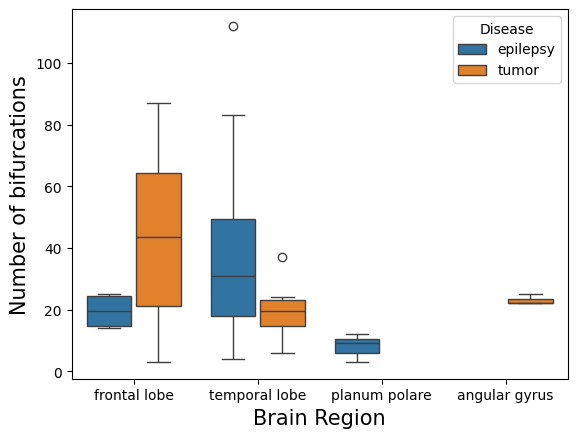

In [379]:
box_dendrite_region = sns.boxplot(data=df, x="structure--name", y="nr--number-bifurcations", hue = "donor--disease-state", gap=.1) 
plt.legend(title = "Disease", prop = {"size" : 10})
box_dendrite_region.set_xlabel("Brain Region", fontsize=15)
box_dendrite_region.set_ylabel("Number of bifurcations", fontsize=15)

plt.savefig("boxplot_bifurc_regions.png")

In [359]:
df_temporal = df[df["structure--name"] == "temporal lobe"]
df_temporal_ep = df_temporal[df_temporal["donor--disease-state"] == "epilepsy"]

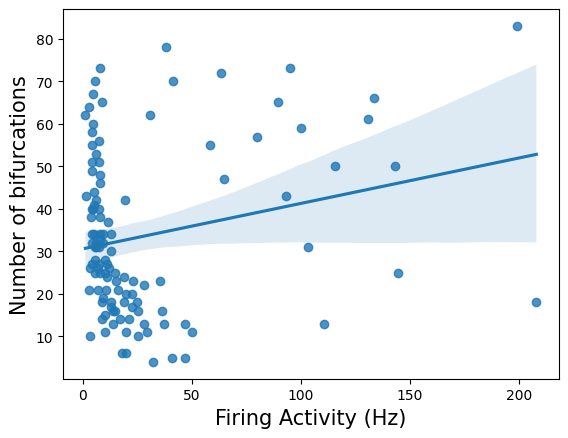

In [372]:
reg = sns.regplot(data=df_temporal_ep, x="avg-firing-rate", y = "nr--number-bifurcations")
reg.set_xlabel("Firing Activity (Hz)", fontsize=15)
reg.set_ylabel("Number of bifurcations", fontsize=15)

plt.savefig("regression_morph_firing_temp_ep.png")

In [373]:
df_frontal = df[df["structure--name"] == "frontal lobe"]
df_frontal_t = df_frontal[df_frontal["donor--disease-state"] == "tumor"]

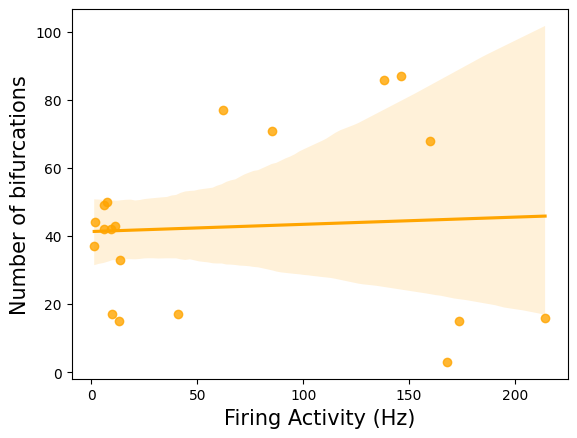

In [376]:
reg = sns.regplot(data=df_frontal_t, x="avg-firing-rate", y = "nr--number-bifurcations", color = "orange")
reg.set_xlabel("Firing Activity (Hz)", fontsize=15)
reg.set_ylabel("Number of bifurcations", fontsize=15)

plt.savefig("regression_morph_firing_fron_t.png")

### Circles with diameter corresponding to neuronal activity (avg-firing-rate) to be then placed on a image of the human brain 

In [192]:
from matplotlib.patches import Circle

In [271]:
firing_structure = df.groupby(["structure--name", "donor--disease-state"]).agg({"avg-firing-rate" :"mean"})
firing_structure.reset_index(inplace=True)
firing_structure

,structure--name,donor--disease-state,avg-firing-rate
0,angular gyrus,epilepsy,33.881111
1,angular gyrus,tumor,11.152000
2,frontal lobe,epilepsy,51.864286
3,frontal lobe,tumor,49.311795
4,planum polare,epilepsy,81.884000
5,temporal lobe,epilepsy,26.678191
6,temporal lobe,tumor,39.697000


In [272]:
from PIL import Image  # to import an image

In [273]:
# dividing by 100 to have values for the diameter of the circles correspondent to the firing
firing_structure["avg-firing-rate"] = firing_structure["avg-firing-rate"].apply(lambda x: x/100)
firing_structure

,structure--name,donor--disease-state,avg-firing-rate
0,angular gyrus,epilepsy,0.338811
1,angular gyrus,tumor,0.111520
2,frontal lobe,epilepsy,0.518643
3,frontal lobe,tumor,0.493118
4,planum polare,epilepsy,0.818840
5,temporal lobe,epilepsy,0.266782
6,temporal lobe,tumor,0.396970


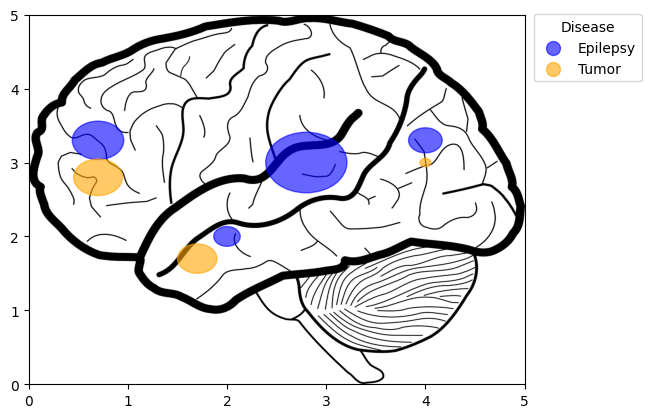

In [332]:
img = Image.open('../brain.png')
fig, ax = plt.subplots()
imgplot = plt.imshow(img, extent=[0, 5, 0, 5], aspect="auto")

# circles with diameter = avg firing rate, center are the coordinates (approximated from brain anatomy)

center_ag_ep = (4, 3.3)  # Center of the circle
diameter_ag_ep = 0.33881  # Diameter of the circle

center_fl_ep = (0.7, 3.3)  
diameter_fl_ep = 0.518643  

center_pp_ep = (2.8, 3)  
diameter_pp_ep = 0.818840  

center_tl_ep = (2, 2)  
diameter_tl_ep = 0.266782 

center_ag_t = (4, 3)  
diameter_ag_t = 0.111520  

center_fl_t = (0.7, 2.8)  
diameter_fl_t = 0.493118  

center_tl_t = (1.7, 1.7)  
diameter_tl_t = 0.396970  

# Create a circle for each region/disease to be "patched" to the brain graph
circle_ag = Circle(center_ag_ep, diameter_ag_ep/2, edgecolor='blue', facecolor='blue', alpha=0.6)
circle_fl = Circle(center_fl_ep, diameter_fl_ep/2, edgecolor='blue', facecolor='blue', alpha=0.6)
circle_pp = Circle(center_pp_ep, diameter_pp_ep/2, edgecolor='blue', facecolor='blue', alpha=0.6)
circle_tl = Circle(center_tl_ep, diameter_tl_ep/2, edgecolor='blue', facecolor='blue', alpha=0.6)

circle_ag_t = Circle(center_ag_t, diameter_ag_t/2, edgecolor='orange', facecolor='orange', alpha=0.6)
circle_fl_t = Circle(center_fl_t, diameter_fl_t/2, edgecolor='orange', facecolor='orange', alpha=0.6)
circle_tl_t = Circle(center_tl_t, diameter_tl_t/2, edgecolor='orange', facecolor='orange', alpha=0.6)

ax.add_patch(circle_ag)
ax.add_patch(circle_fl)
ax.add_patch(circle_pp)
ax.add_patch(circle_tl)
ax.add_patch(circle_ag_t)
ax.add_patch(circle_fl_t)
ax.add_patch(circle_tl_t)


# Add the legend
ep = plt.scatter([], [], s=100, color="blue", alpha = 0.6, label="Epilepsy")
t = plt.scatter([], [], s=100, color="orange", alpha = 0.6, label="Tumor")

legend = plt.legend(handles=[ep, t], title="Disease", prop={"size": 10}, bbox_to_anchor=(1.25, 0.91), loc="center right")

# save the image
fig.savefig("brain_circles.png", bbox_inches='tight')  # bbox_inches='tight' is to take all the image without cutting uout the legend